In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, \
accuracy_score, recall_score, precision_score, f1_score, log_loss, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('Terry_stops_cleaned.csv')

df.head()

,subject_age_group,stop_resolution,weapon_type,officer_id,officer_age,officer_gender,officer_race,subject_perceived_race,subject_perceived_gender,reported_date,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,NaN,Arrest,None,7500,37,M,Black or African American,Asian,Male,1444953600000000000,NaN,NaN,NaN,SOUTH PCT 1ST W - ROBERT,0,0.0,South,O,O2
1,NaN,Field Contact,None,5670,56,M,White,Unknown,Unknown,1426723200000000000,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
2,NaN,Field Contact,None,7539,58,M,White,Unknown,Unknown,1427846400000000000,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
3,NaN,Field Contact,None,6973,44,M,White,Black or African American,Male,1428019200000000000,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN
4,NaN,Field Contact,None,7402,48,M,White,Black or African American,Male,1428192000000000000,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48007 entries, 0 to 48006
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_age_group         46499 non-null  object 
 1   stop_resolution           48007 non-null  object 
 2   weapon_type               48007 non-null  object 
 3   officer_id                47983 non-null  object 
 4   officer_age               48007 non-null  int64  
 5   officer_gender            48007 non-null  object 
 6   officer_race              48007 non-null  object 
 7   subject_perceived_race    48007 non-null  object 
 8   subject_perceived_gender  48007 non-null  object 
 9   reported_date             48007 non-null  int64  
 10  initial_call_type         34965 non-null  object 
 11  final_call_type           34965 non-null  object 
 12  call_type                 34965 non-null  object 
 13  officer_squad             47414 non-null  object 
 14  arrest

In [4]:
#  Will create a baseline model using age, gender and race of the subject and officer to see if we can predict arrests


In [5]:
df.columns

Index(['subject_age_group', 'stop_resolution', 'weapon_type', 'officer_id',
       'officer_age', 'officer_gender', 'officer_race',
       'subject_perceived_race', 'subject_perceived_gender', 'reported_date',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat'],
      dtype='object')

In [6]:
# Separate continuous and categorical columns for pre-processing

cat_columns = ['subject_age_group', 'officer_gender', 'officer_race', 'subject_perceived_race', 
         'subject_perceived_gender', 'officer_squad', 'arrest_flag','frisk_flag']

cont_columns = ['officer_age', 'reported_date']


In [7]:
# dummied categorical columns
cat_columns_dummied = pd.get_dummies(df[cat_columns], drop_first=True,dtype=float)
cat_columns_dummied.head()

,arrest_flag,frisk_flag,subject_age_group_18 - 25,subject_age_group_26 - 35,subject_age_group_36 - 45,subject_age_group_46 - 55,subject_age_group_56 and Above,officer_gender_M,officer_gender_N,officer_race_Asian,...,officer_squad_WEST PCT 3RD W - KING,officer_squad_WEST PCT 3RD W - MARY,officer_squad_WEST PCT 3RD W - QUEEN,officer_squad_WEST PCT OPS - ACT NIGHT,officer_squad_WEST PCT OPS - BURG/THEFT,officer_squad_WEST PCT OPS - COMMERCIAL SEC,officer_squad_WEST PCT OPS - CPT,officer_squad_WEST PCT OPS - MOUNTED PATROL,officer_squad_WEST PCT OPS - SEA CTR,officer_squad_ZOLD CRIME ANALYSIS UNIT - ANALYSTS
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#recombine processed columns
df_preprocessed = pd.concat([cat_columns_dummied, df[cont_columns]], axis=1)

In [24]:
# Create X and y variables
X = df_preprocessed.drop(columns='arrest_flag').copy()
y = df_preprocessed['arrest_flag']


In [25]:
# Creating Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
# Use SMOTE to balance out the data

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train,y_train)

In [60]:
#baseline model
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

dummy_clf.fit(X_train_resampled,y_train_resampled)

dummy_clf.predict(X_test)

baseline_acc_score = dummy_clf.score(X_test, y_test)
baseline_acc_score

0.9240126645559074

In [51]:
#Instatiate Logistic Regression Model
logreg = LogisticRegression(random_state=42, solver='liblinear')

#fit and transform
logreg.fit(X_train_resampled, y_train_resampled)

# scores
y_pred = logreg.predict(X_test)

baseline_accuracy_score = logreg.score(X_train_resampled, y_train_resampled)

baseline_recall_score = recall_score(y_test,y_pred)
baseline_precision_score = precision_score(y_test,y_pred)
baseline_f1_score = f1_score(y_test,y_pred)

baseline_accuracy_score, baseline_recall_score, baseline_precision_score, baseline_f1_score, log_loss(y_test,y_pred)

(0.5, 1.0, 0.07598733544409265, 0.14124206287749727, 31.91500564531414)

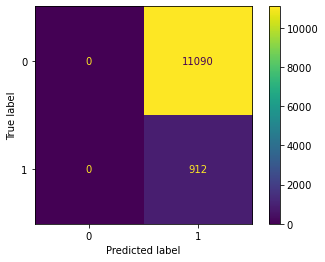

In [61]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.grid(False)
plt.show()

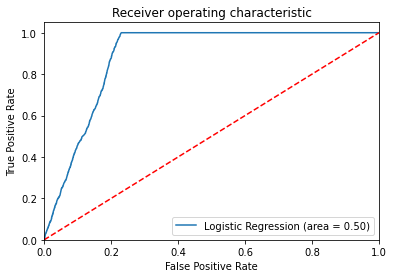

In [62]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()